# Pandas puzzles

Inspired by [100 Numpy exerises](https://github.com/rougier/numpy-100), here are 100* short puzzles for testing your knowledge of [pandas'](http://pandas.pydata.org/) power.

Since pandas is a large library with many different specialist features and functions, these exercises focus mainly on the fundamentals of manipulating data (indexing, grouping, aggregating, cleaning), making use of the core DataFrame and Series objects. 

Many of the exercises here are stright-forward in that the solutions require no more than a few lines of code (in pandas or NumPy... don't go using pure Python or Cython!). Choosing the right methods and following best practices is the underlying goal.

The exercises are loosely divided in sections. Each section has a difficulty rating; these ratings are subjective, of course, but should be a seen as a rough guide as to how inventive the required solution is.

If you're just starting out with pandas and you are looking for some other resources, the official documentation  is very extensive. In particular, some good places get a broader overview of pandas are...

- [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
- [pandas basics](http://pandas.pydata.org/pandas-docs/stable/basics.html)
- [tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)
- [cookbook and idioms](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

Enjoy the puzzles!

## Importing pandas

### Getting started and checking your pandas setup

Difficulty: *easy* 

**1.** Import pandas under the name `pd`.

In [1]:
import pandas as pd

**2.** Print the version of pandas that has been imported.

In [3]:
pd.__version__

'1.2.0'

**3.** Print out all the version information of the libraries that are required by the pandas library.

In [4]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 3e89b4c4b1580aa890023fc550774e63d499da25
python           : 3.7.3.candidate.1
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19041
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : en.UTF-8
LOCALE           : None.None

pandas           : 1.2.0
numpy            : 1.19.5
pytz             : 2020.5
dateutil         : 2.8.1
pip              : 20.3.3
setuptools       : 51.1.2
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.11.2
IPython          : 7.19.0
pandas_datareader: None
bs4              : None
bottleneck       : None
fsspec           

## DataFrame basics

### A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames

Difficulty: *easy*

Note: remember to import numpy using:
```python
import numpy as np
```

Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**4.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [30]:
import numpy as np
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)

**5.** Display a summary of the basic information about this DataFrame and its data.

In [7]:
df.describe()

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


**6.** Return the first 3 rows of the DataFrame `df`.

In [10]:
df.iloc[:3]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**7.** Select just the 'animal' and 'age' columns from the DataFrame `df`.

In [11]:
df[["animal", "age"]]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**8.** Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

In [13]:
df.loc[df.index[[3, 4, 8]], ['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**9.** Select only the rows where the number of visits is greater than 3.

In [15]:
df[df["visits"]>3]

,animal,age,visits,priority


**10.** Select the rows where the age is missing, i.e. is `NaN`.

In [17]:
df[df["age"].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**11.** Select the rows where the animal is a cat *and* the age is less than 3.

In [19]:
df[(df["animal"] == "cat") & (df["age"] < 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**12.** Select the rows the age is between 2 and 4 (inclusive).

In [21]:
df[(df['age']>2) & (df['age']<4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
j,dog,3.0,1,no


**13.** Change the age in row 'f' to 1.5.

In [22]:
df.loc['f', 'age'] = 1.5

**14.** Calculate the sum of all visits (the total number of visits).

In [23]:
df["visits"].sum()

19

**15.** Calculate the mean age for each different animal in `df`.

In [24]:
df.groupby('animal')["age"].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

**16.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [32]:
df.loc["k"] = ["cat", 2.5, 1, "yes"]

df.drop('k')

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**17.** Count the number of each type of animal in `df`.

In [33]:
df['animal'].value_counts()

cat      5
dog      4
snake    2
Name: animal, dtype: int64

**18.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order.

In [34]:
df.sort_values(by=['age', 'visits'], ascending=[False, True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
k,cat,2.5,1,yes
f,cat,2.0,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes


**19.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [35]:
df['priority'] = df['priority'].map({'yes': True, 'no': False})

**20.** In the 'animal' column, change the 'snake' entries to 'python'.

In [36]:
df['animal'] = df['animal'].replace('snake', 'python')

**21.** For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).

In [41]:
pd.pivot_table(df, index="animal",
               values=["age"], 
               aggfunc=np.mean, 
               columns=['visits'])

age          
visits    1    2    3
animal               
cat     2.5  NaN  2.5
dog     3.0  6.0  NaN
python  4.5  0.5  NaN

## DataFrames: using complicated functions

Difficulty: *medium*

here you will be asked to generate your own test data and manipulate it using functions you will have to create.

**22.** Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
you might want to use numpy.random

In [47]:
import random
import numpy as np

age = np.random.randint(20, 65, 1000)
skill = np.random.normal(0.5, 0.3, 1000)
height = np.random.randint(150, 200, 1000)/100.0
all_data = np.transpose(np.array([age, skill, height]))

df = pd.DataFrame(all_data, 
                  columns=['age', 'skill', 'height'])

(1000, 3)


**23.** Add the dataframe a new columns, called salary, when:
        salary = 1000*((age^2)/1000 + 1.7*skill + 0.4*exp(-(height-1.7)**2)

In [50]:
df["salary"] = 1000*(
    (df["age"]**2)/1000 + 
                     1.7*df["skill"] +
                     0.4*np.exp(-(df["height"]-1.7)**2))

df

,age,skill,height,salary
0,37.0,0.377881,1.67,2411.037470
1,56.0,0.849274,1.92,4960.867371
2,56.0,0.058008,1.90,3618.929556
3,54.0,-0.054476,1.80,3219.410674
4,22.0,0.944122,1.76,2487.570786
...,...,...,...,...
995,63.0,0.858620,1.61,5825.427496
996,50.0,1.224165,1.59,4976.269264
997,63.0,0.293779,1.55,4859.524814
998,62.0,0.129486,1.62,4461.575033


**24.** Split the dataframe to groups by the age left digit and by the age. for each group compute:
        - the number of rows
        - the mean salary
        - the maximum height

In [61]:
dfgroupby = df.groupby(by=[pd.Series(df["age"]/10), df["age"]],
          )

def compute(df_param):
    res = pd.DataFrame({
        "nb_rows": [len(df_param)],
        "mean_salary": [df_param["salary"].mean()],
        "max_height": [df_param["height"].max()]
    })
    return res
    
df_results = dfgroupby.apply(compute)
df_results

,,,nb_rows,mean_salary,max_height
age,age,,,,
2.0,20.0,0,20,1804.509780,1.98
2.1,21.0,0,18,1513.321295,1.99
2.2,22.0,0,21,1809.410426,1.96
2.3,23.0,0,18,1808.218962,1.99
2.4,24.0,0,20,1833.103276,1.99
2.5,25.0,0,21,2048.850471,1.99
2.6,26.0,0,25,1861.911412,1.99
2.7,27.0,0,17,1923.813646,1.99
2.8,28.0,0,23,1994.792769,1.99


**25.** Now split the dataframe to groups by age. for each group compute the mean salary, split by the sum of heights.

In [63]:
def compute_sal(df_param):
    return pd.DataFrame({
        "res": [df_param["salary"].mean() / df_param["height"].sum()]
    })

df.groupby(['age']).apply(compute_sal)

,,res
age,,
20.0,0,53.673700
21.0,0,47.114611
22.0,0,49.640890
23.0,0,57.881529
24.0,0,51.491665
25.0,0,55.106253
26.0,0,42.577439
27.0,0,67.125389
28.0,0,49.944736


**26.** Add these lines to your code:

        import matplotlib.pyplot as plt
        %matplotlib inline
        
Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.

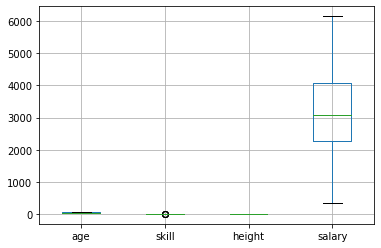

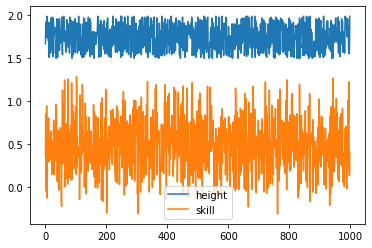

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

df.boxplot()
df[["height", "skill"]].plot()
plt.show()

**27.** Save the result as a csv, then read the csv to the variable "data" using pandas

In [75]:
df.to_csv("data.csv")
data = pd.read_csv('data.csv')

## DataFrames: beyond the basics

### Slightly trickier: you may need to combine two or more methods to get the right answer

Difficulty: *medium*

The previous section was tour through some basic but essential DataFrame operations. Below are some ways that you might need to cut your data, but for which there is no single "out of the box" method.

**28.** You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

In [77]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})

df_shifted = df.shift()
df.loc[df_shifted['A'] != df['A']]

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


**29.** Given a DataFrame of numeric values, say
```python
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
```

how do you subtract the row mean from each element in the row?

In [80]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
print("df", df.shape)
print("df.mean", df.mean(axis=1).shape)
df.sub(df.mean(axis=1), axis=0)

df (5, 3)
df.mean (5,)


,0,1,2
0,-0.065798,0.225794,-0.159996
1,-0.199965,-0.218640,0.418605
2,-0.411210,0.151909,0.259301
3,-0.254477,0.085282,0.169195
4,-0.247745,0.111053,0.136692


**30.** Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum? (Find that column's label.)

In [84]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))

df.sum().idxmin()

'b'

**31.** How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

In [89]:
len(df.drop_duplicates(keep=False))

5

The next three puzzles are slightly harder...

**32.** You have a DataFrame that consists of 10 columns of floating--point numbers. Suppose that exactly 5 entries in each row are NaN values. For each row of the DataFrame, find the *column* which contains the *third* NaN value.

(You should return a Series of column labels.)

In [113]:
from numpy import nan
df = pd.DataFrame({
    'A': [1, nan, nan, nan],
    'B': [nan, 2, nan, 3],
    'C': [nan, 2, 2, nan],
    'D': [1, nan, 2, 8],
})

(df.isnull().cumsum(axis=1) == 2).idxmax(axis=1)

0    C
1    D
2    B
3    C
dtype: object

**33.** A DataFrame has a column of groups 'grps' and and column of numbers 'vals'. For example: 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values.

In [125]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

df_groupby = df.groupby(by=["grps"])['vals'].nlargest(3)
df_groupby.groupby(by=["grps"]).sum()

grps
a    409
b    156
c    345
Name: vals, dtype: int64

**34.** A DataFrame has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive). For each group of 10 consecutive integers in 'A' (i.e. `(0, 10]`, `(10, 20]`, ...), calculate the sum of the corresponding values in column 'B'.

In [129]:
df = pd.DataFrame({
    "A": np.random.randint(1, 100, 100),
    "B": np.random.randint(1, 100, 100)
})

df.groupby(pd.cut(df['A'], np.arange(0, 101, 10)))['B'].sum()

A
(0, 10]      515
(10, 20]     541
(20, 30]     624
(30, 40]     471
(40, 50]     263
(50, 60]     696
(60, 70]     195
(70, 80]     756
(80, 90]     439
(90, 100]    568
Name: B, dtype: int32

## DataFrames: harder problems 

### These might require a bit of thinking outside the box...

...but all are solvable using just the usual pandas/NumPy methods (and so avoid using explicit `for` loops).

Difficulty: *hard*

**35.** Consider a DataFrame `df` where there is an integer column 'X':
```python
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
```
For each value, count the difference back to the previous zero (or the start of the Series, whichever is closer). These values should therefore be `[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]`. Make this a new column 'Y'.

In [153]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

idx_zeros = (df['X'] == 0).to_numpy().nonzero()[0]
idx_zeros = np.concatenate(([-1], idx_zeros))
print("idx_zeros", idx_zeros)

all_idx = np.arange(len(df))
print("all_idx", all_idx)

idx_zeros_suite = idx_zeros[np.searchsorted(idx_zeros-1, all_idx)-1]
print("idx_zeros_suite", idx_zeros_suite)

df["y"]=all_idx-idx_zeros_suite

df

idx_zeros [-1  2  7]
all_idx [0 1 2 3 4 5 6 7 8 9]
idx_zeros_suite [-1 -1  2  2  2  2  2  7  7  7]


,X,y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


**36.** Consider a DataFrame containing rows and columns of purely numerical data. Create a list of the row-column index locations of the 3 largest values.

In [166]:
df.unstack().sort_values()[-3:].index.tolist()

[('X', 4), ('X', 6), ('X', 0)]

**37.** Given a DataFrame with a column of group IDs, 'grps', and a column of corresponding integer values, 'vals', replace any negative values in 'vals' with the group mean.

In [186]:
df = pd.DataFrame({
    "grps": [1,2,1,2,1,2],
    "vals": [100,2,300,4,500,-2]
})

df_groupby = df.groupby(by=["grps"])

def imputation(df_param):
    df_param[df_param["vals"] < 0] = nan
    df_param[df_param["vals"].isnull()] = df_param.mean()
    return df_param

df_groupby.apply(imputation)

,grps,vals
0,1.0,100.0
1,2.0,2.0
2,1.0,300.0
3,2.0,4.0
4,1.0,500.0
5,2.0,3.0


**38.** Implement a rolling mean over groups with window size 3, which ignores NaN value. For example consider the following DataFrame:

```python
>>> df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, 
                                 np.nan, 1, 7, 3, np.nan, 8]})
>>> df
   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0
```
The goal is to compute the Series:

```
0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
```
E.g. the first window of size three for group 'b' has values 3.0, NaN and 3.0 and occurs at row index 5. Instead of being NaN the value in the new column at this row index should be 3.0 (just the two non-NaN values are used to compute the mean (3+3)/2)

In [199]:
df = pd.DataFrame({'group': list('aabbabbbabab'),
                   'value': [1, 2, 3, np.nan, 2, 3,np.nan, 1, 7, 3, np.nan, 8]})

df_groupby = df.groupby(['group'])['value']
df_groupby_0 = df.fillna(0).groupby(['group'])['value']

s = df_groupby_0.rolling(3, min_periods=1).sum() / df_groupby.rolling(3, min_periods=1).count()
s.reset_index(level=0, drop=True).sort_index()

0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
Name: value, dtype: float64

## Series and DatetimeIndex

### Exercises for creating and manipulating Series with datetime data

Difficulty: *easy/medium*

pandas is fantastic for working with dates and times. These puzzles explore some of this functionality.


**39.** Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series `s`.

In [200]:
dti = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
s = pd.Series(np.random.rand(len(dti)), index=dti)

**40.** Find the sum of the values in `s` for every Wednesday.

In [201]:
s[s.index.weekday == 2].sum() 

25.669945006787735

**41.** For each calendar month in `s`, find the mean of values.

In [202]:
s.resample('M').mean()

2015-01-31    0.532782
2015-02-28    0.588737
2015-03-31    0.512993
2015-04-30    0.401152
2015-05-31    0.543471
2015-06-30    0.458945
2015-07-31    0.537609
2015-08-31    0.522682
2015-09-30    0.504647
2015-10-31    0.425139
2015-11-30    0.456509
2015-12-31    0.499767
Freq: M, dtype: float64

**42.** For each group of four consecutive calendar months in `s`, find the date on which the highest value occurred.

In [203]:
s.groupby(pd.Grouper(freq='4M')).idxmax()

2015-01-31   2015-01-13
2015-05-31   2015-05-04
2015-09-30   2015-06-05
2016-01-31   2015-10-29
Freq: 4M, dtype: datetime64[ns]

**43.** Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

In [204]:
pd.date_range('2015-01-01', '2016-12-31', freq='WOM-3THU')

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

## Cleaning Data

### Making a DataFrame easier to work with

Difficulty: *easy/medium*

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```
(It's some flight data I made up; it's not meant to be accurate in any way.)


**44.** Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

In [225]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
                   'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})

df = df.interpolate()

print(df)

            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM(!)
1      MAdrid_miLAN       10055.0            []    <Air France> (12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis       10075.0          [13]       12. Air France
4   Brussels_londOn       10085.0      [67, 32]          "Swiss Air"


**45.** The From\_To column would be better as two separate columns! Split each string on the underscore delimiter `_` to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame. 

In [218]:
From_To = df["From_To"]
temp_df = From_To.str.split('_', expand=True)
temp_df.columns = ['From', 'To']

temp_df

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


**46.** Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [220]:
temp_df['From'] = temp_df['From'].str.capitalize()
temp_df['To'] = temp_df['To'].str.capitalize()

**47.** Delete the From_To column from `df` and attach the temporary DataFrame from the previous questions.

In [226]:
df = df.drop(["From_To"], axis=1)
df["From"] = temp_df["From"]
df["To"] = temp_df["To"]
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045.0,"[23, 47]",KLM(!),London,Paris
1,10055.0,[],<Air France> (12),Madrid,Milan
2,10065.0,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075.0,[13],12. Air France,Budapest,Paris
4,10085.0,"[67, 32]","""Swiss Air""",Brussels,London


**48**. In the Airline column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [227]:
df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()


**49**. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named `delays`, rename the columns `delay_1`, `delay_2`, etc. and replace the unwanted RecentDelays column in `df` with `delays`.

In [236]:
delays = df['RecentDelays'].apply(pd.Series)
delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]
df = df.drop('RecentDelays', axis=1).join(delays)

df

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045.0,KLM,London,Paris,23.0,47.0,NaN
1,10055.0,Air France,Madrid,Milan,NaN,NaN,NaN
2,10065.0,British Airways,London,Stockholm,24.0,43.0,87.0
3,10075.0,Air France,Budapest,Paris,13.0,NaN,NaN
4,10085.0,Swiss Air,Brussels,London,67.0,32.0,NaN


The DataFrame should look much better now.

## Using MultiIndexes

### Go beyond flat DataFrames with additional index levels

Difficulty: *medium*

Previous exercises have seen us analysing data from DataFrames equipped with a single index level. However, pandas also gives you the possibilty of indexing your data using *multiple* levels. This is very much like adding new dimensions to a Series or a DataFrame. For example, a Series is 1D, but by using a MultiIndex with 2 levels we gain of much the same functionality as a 2D DataFrame.

The set of puzzles below explores how you might use multiple index levels to enhance data analysis.

To warm up, we'll look make a Series with two index levels. 

letters = ['A', 'B', 'C']**50**. Given the lists `letters = ['A', 'B', 'C']` and `numbers = list(range(10))`, construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series `s`.

In [238]:
letters = ['A', 'B', 'C']
numbers = list(range(10))

index = pd.MultiIndex.from_product([letters, numbers])
s = pd.Series(np.random.rand(30), index=index)

s

A  0    0.018614
   1    0.894876
   2    0.821955
   3    0.905427
   4    0.968518
   5    0.867848
   6    0.560875
   7    0.261422
   8    0.835799
   9    0.215056
B  0    0.930282
   1    0.995884
   2    0.328634
   3    0.598075
   4    0.366307
   5    0.800321
   6    0.282762
   7    0.064335
   8    0.413195
   9    0.076255
C  0    0.527724
   1    0.221799
   2    0.173182
   3    0.424426
   4    0.276815
   5    0.688984
   6    0.927382
   7    0.578520
   8    0.753589
   9    0.562227
dtype: float64

**51.** Check the index of `s` is lexicographically sorted (this is a necessary proprty for indexing to work correctly with a MultiIndex).

In [240]:
s.index.is_lexsorted()

True

**52**. Select the labels `1`, `3` and `6` from the second level of the MultiIndexed Series.

In [242]:
s.loc[:, [1,3,6]]

A  1    0.894876
   3    0.905427
   6    0.560875
B  1    0.995884
   3    0.598075
   6    0.282762
C  1    0.221799
   3    0.424426
   6    0.927382
dtype: float64

**53**. Slice the Series `s`; slice up to label 'B' for the first level and from label 5 onwards for the second level.

In [244]:
s.loc[:"B", 5:]

A  5    0.867848
   6    0.560875
   7    0.261422
   8    0.835799
   9    0.215056
B  5    0.800321
   6    0.282762
   7    0.064335
   8    0.413195
   9    0.076255
dtype: float64

**54**. Sum the values in `s` for each label in the first level (you should have Series giving you a total for labels A, B and C).

In [246]:
s.sum(level=0)

A    6.350390
B    4.856051
C    5.134650
dtype: float64

**55**. Suppose that `sum()` (and other methods) did not accept a `level` keyword argument. How else could you perform the equivalent of `s.sum(level=1)`?

In [248]:
s.unstack().sum(axis=0)

0    1.476620
1    2.112558
2    1.323771
3    1.927928
4    1.611641
5    2.357154
6    1.771020
7    0.904277
8    2.002584
9    0.853538
dtype: float64

**56**. Exchange the levels of the MultiIndex so we have an index of the form (letters, numbers). Is this new Series properly lexsorted? If not, sort it.

In [250]:
s_swapped = s.swaplevel(0, 1)
s_swapped = s_swapped.sort_index()

s_swapped.index.is_lexsorted()

True

## Minesweeper

### Generate the numbers for safe squares in a Minesweeper grid

Difficulty: *medium* to *hard*

If you've ever used an older version of Windows, there's a good chance you've played with [Minesweeper](https://en.wikipedia.org/wiki/Minesweeper_(video_game). If you're not familiar with the game, imagine a grid of squares: some of these squares conceal a mine. If you click on a mine, you lose instantly. If you click on a safe square, you reveal a number telling you how many mines are found in the squares that are immediately adjacent. The aim of the game is to uncover all squares in the grid that do not contain a mine.

In this section, we'll make a DataFrame that contains the necessary data for a game of Minesweeper: coordinates of the squares, whether the square contains a mine and the number of mines found on adjacent squares.

**57**. Let's suppose we're playing Minesweeper on a 5 by 4 grid, i.e.
```
X = 5
Y = 4
```
To begin, generate a DataFrame `df` with two columns, `'x'` and `'y'` containing every coordinate for this grid. That is, the DataFrame should start:
```
   x  y
0  0  0
1  0  1
2  0  2
```

In [257]:
X, Y = 5, 4

x_array = np.arange(X)
y_array = np.arange(Y)

index = pd.MultiIndex.from_product([x_array, y_array], 
                                   names = ["x", "y"])
df = pd.DataFrame(index=index).reset_index()

df

,x,y
0,0,0
1,0,1
2,0,2
3,0,3
4,1,0
5,1,1
6,1,2
7,1,3
8,2,0
9,2,1


**58**. For this DataFrame `df`, create a new column of zeros (safe) and ones (mine). The probability of a mine occuring at each location should be 0.4.

In [259]:
mines_array = np.random.binomial(1, 0.4, X*Y)
df["mine"] = mines_array

df

,x,y,mine
0,0,0,0
1,0,1,1
2,0,2,1
3,0,3,1
4,1,0,1
5,1,1,0
6,1,2,1
7,1,3,0
8,2,0,1
9,2,1,0


**59**. Now create a new column for this DataFrame called `'adjacent'`. This column should contain the number of mines found on adjacent squares in the grid. 

(E.g. for the first row, which is the entry for the coordinate `(0, 0)`, count how many mines are found on the coordinates `(0, 1)`, `(1, 0)` and `(1, 1)`.)

In [271]:
from scipy.signal import convolve2d

mine_grid = df.pivot_table(columns='x', index='y', values='mine')
counts = convolve2d(mine_grid.astype(complex), np.ones((3, 3)), mode='same').real.astype(int)

adj = (counts - mine_grid).to_numpy().ravel()
print(adj.shape)
print(df.shape)
df['adjacent'] = adj

df

(20,)
(20, 4)


,x,y,mine,adjacent
0,0,0,0,2
1,0,1,1,2
2,0,2,1,2
3,0,3,1,3
4,1,0,1,2
5,1,1,0,3
6,1,2,1,5
7,1,3,0,5
8,2,0,1,6
9,2,1,0,4


**60**. For rows of the DataFrame that contain a mine, set the value in the `'adjacent'` column to NaN.

In [272]:
df.loc[df['mine'] == 1, 'adjacent'] = np.nan

df

,x,y,mine,adjacent
0,0,0,0,2.0
1,0,1,1,NaN
2,0,2,1,NaN
3,0,3,1,NaN
4,1,0,1,NaN
5,1,1,0,3.0
6,1,2,1,NaN
7,1,3,0,5.0
8,2,0,1,NaN
9,2,1,0,4.0


**61**. Finally, convert the DataFrame to grid of the adjacent mine counts: columns are the `x` coordinate, rows are the `y` coordinate.

In [274]:
df = df.drop('mine', axis=1).set_index(['y', 'x']).unstack()

df

adjacent                   
x        0    1    2    3   4
y                            
0      2.0  NaN  NaN  NaN NaN
1      NaN  3.0  4.0  3.0 NaN
2      NaN  NaN  3.0  NaN NaN
3      NaN  5.0  3.0  2.0 NaN